In [1]:
from morph import *
import cv2
import numpy as np
%matplotlib inline

In [2]:
img = cv2.imread("smile.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
ee = np.ones((3,3), dtype=np.uint8)

fm = FilterManager(img, ee)

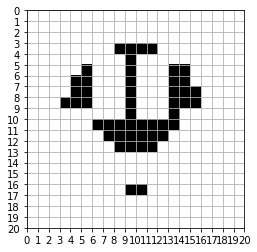

In [3]:
fm.show(fm.apply_filter('er', 1))

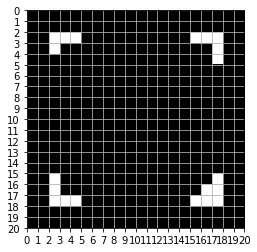

In [4]:
fm.show(fm.apply_filter('di', 1))

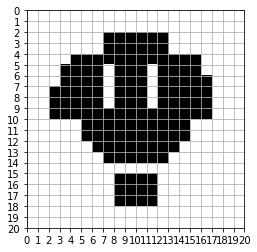

In [5]:
fm.show(fm.apply_filter('op', 1))

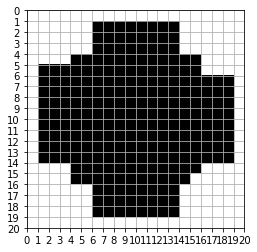

In [6]:
fm.show(fm.apply_filter('cl', 1))

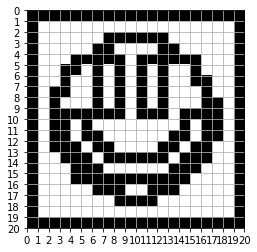

In [7]:
fm.show(fm.apply_filter('ig', 1))

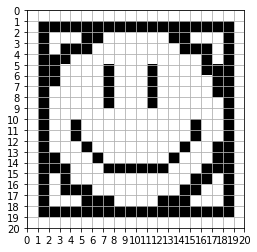

In [8]:
fm.show(fm.apply_filter('eg', 1))

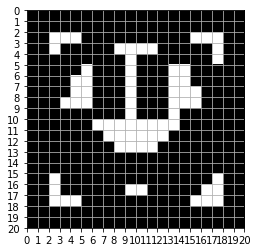

In [9]:
fm.show(fm.apply_filter('mg', 1))

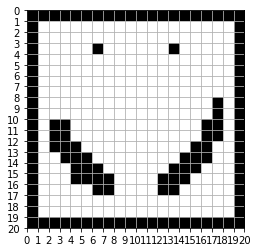

In [10]:
fm.show(fm.apply_filter('wth', 1))

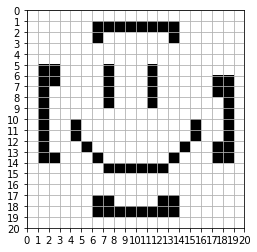

In [11]:
fm.show(fm.apply_filter('bth', 1))

In [12]:
test_img = np.array([[255,255,255,0], 
                  [255,255,255,255], 
                  [255,255,255,255],
                  [0,255,255,255]], dtype=np.uint8)

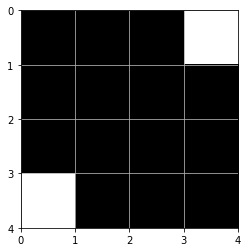

In [13]:
fm2 = FilterManager(test_img, ee)
fm2.show(test_img)

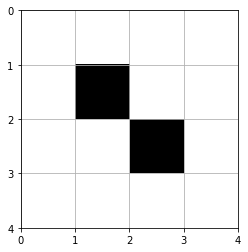

In [14]:
fm2.show(fm2.apply_filter('er', 1))

In [15]:
test_img_2 = np.array([[0,  0, 255, 255, 0, 0], 
                       [0, 255, 255, 255, 255, 0], 
                       [255, 255, 255, 255, 255, 0],
                       [0, 255, 255, 255, 255, 0],  
                       [0, 0, 255, 255, 255, 0],
                       [0, 0, 255, 255, 0, 0]], dtype=np.uint8)

In [16]:
test_img_2.shape

(6, 6)

In [17]:
fm3 = FilterManager(test_img_2, ee)

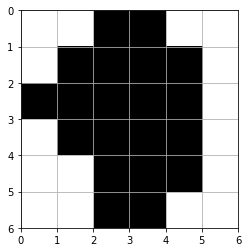

In [18]:
fm3.show(test_img_2)

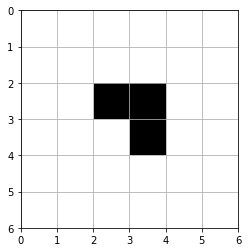

In [19]:
fm3.show(fm3.apply_filter('er', 1))

In [20]:
ico = cv2.imread("favicon.png")
ico = cv2.cvtColor(ico, cv2.COLOR_BGR2GRAY) 
ee = np.ones((3,3), dtype=np.uint8)

fm4 = FilterManager(ico, ee)

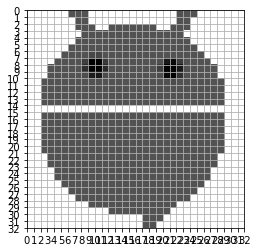

In [21]:
fm4.show(ico)

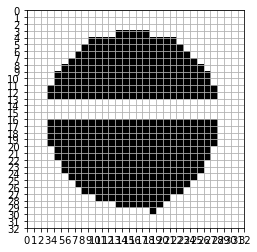

In [22]:
fm4.show(fm4.apply_filter('er', 1))

In [23]:
#%time fm4.show(fm4.apply_filter('er', 5))

CPU times: user 533 ms, sys: 1.67 ms, total: 534 ms
Wall time: 533 ms


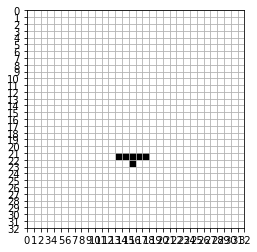

In [24]:
%time fm4.show(fm4.apply_filter_recursive('er', 6))

CPU times: user 437 ms, sys: 3.02 ms, total: 440 ms
Wall time: 437 ms


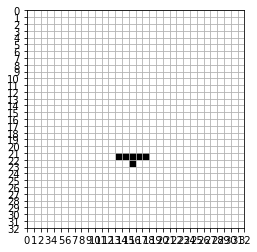

In [25]:
%time fm4.show(fm4.apply_filter('er', 6))